<a href="https://colab.research.google.com/github/angelicago/ConjuntoDados/blob/main/dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("forecast")
install.packages("ggplot2")
install.packages("urca")
install.packages("lmtest")
install.packages("seasonal")
install.packages("seasonalview")
install.packages("openxlsx")
install.packages("GeneCycle")
install.packages("randtests")
install.packages("psych")


In [ ]:
library("randtests")
library("openxlsx")
library("forecast")
library("ggplot2")
library("lmtest")
library("seasonal")
library("seasonalview")
library("GeneCycle")
library("urca")
library("psych")

In [ ]:
install.packages("RCurl")

In [ ]:
library(RCurl)

In [73]:
URL <- "https://raw.githubusercontent.com/angelicago/ConjuntoDados/main/dengue2.txt"
x <- getURL(URL)


In [72]:
dados <- read.table(textConnection(x), header = T)
head(dados)

,QTD
,<dbl>
1,2.191398
2,5.221691
3,10.802908
4,7.378848
5,3.081654
6,0.462248


In [75]:
# Verificando a necessidade de transformação
casostotal = ts(dados,start = c(2010,1), end=c(2020,7), frequency=12)
shapiro.test(casostotal)




	Shapiro-Wilk normality test

data:  casostotal
W = 0.43312, p-value < 2.2e-16


In [76]:
#TRANSFORMAÇÃO DOS DADOS - NORMALIDADE
casostotal = ts(dados,start = c(2010,1), end=c(2020,7), frequency=12)
lambda <- BoxCox.lambda(casostotal,method=c("loglik"),lower=-5, upper=5)
lambda
dengue_trasnf=BoxCox(casostotal,lambda)
shapiro.test(dengue_trasnf)

[1] -0.2


	Shapiro-Wilk normality test

data:  dengue_trasnf
W = 0.98736, p-value = 0.292


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.5108 -0.3497  0.3583  0.5125  1.4348  3.1227 

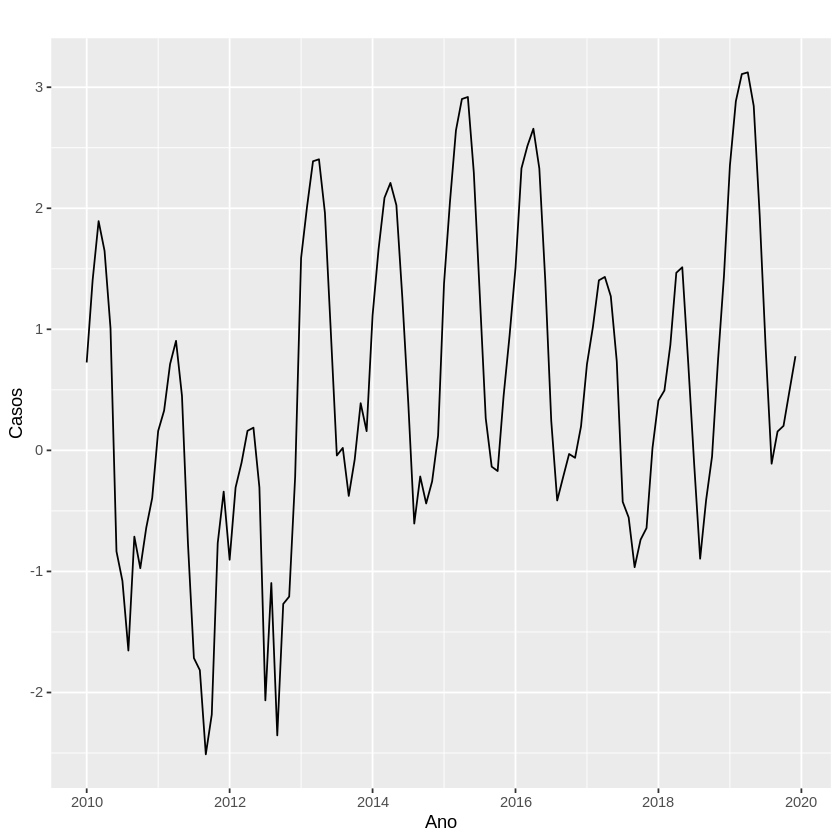

In [77]:
dengue1 = window(dengue_trasnf,start =c(2010,1),end=c(2019,12),frequency = 12 ) 
casostest = window(dengue_trasnf,start =c(2020,1),end=c(2020,7),frequency = 12 ) 
summary(dengue1)
autoplot(dengue1,xlab = "Ano",ylab = "Casos")

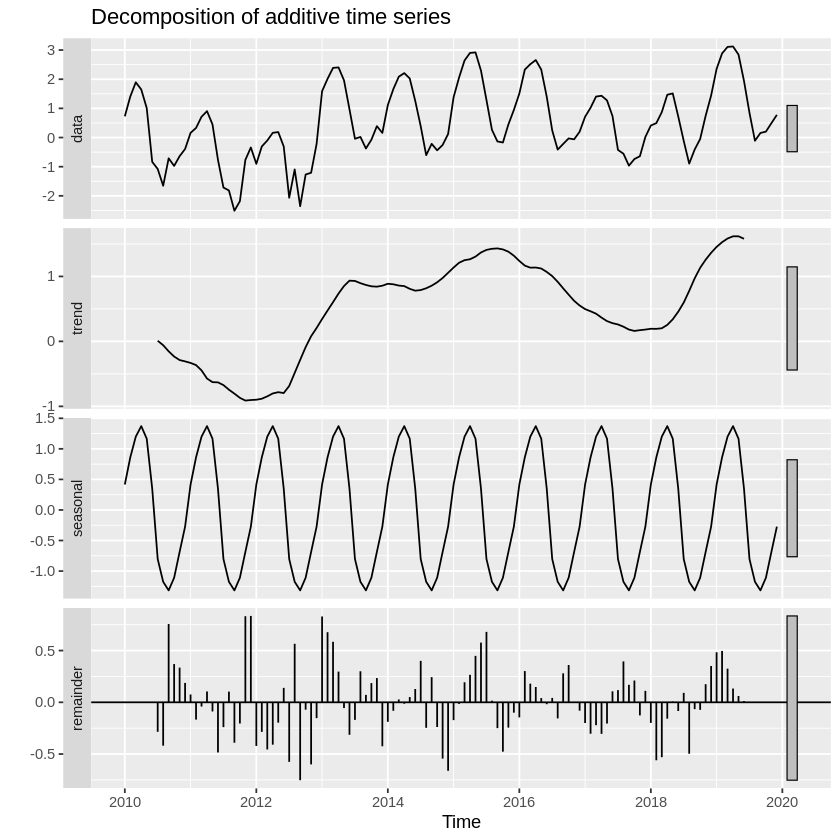

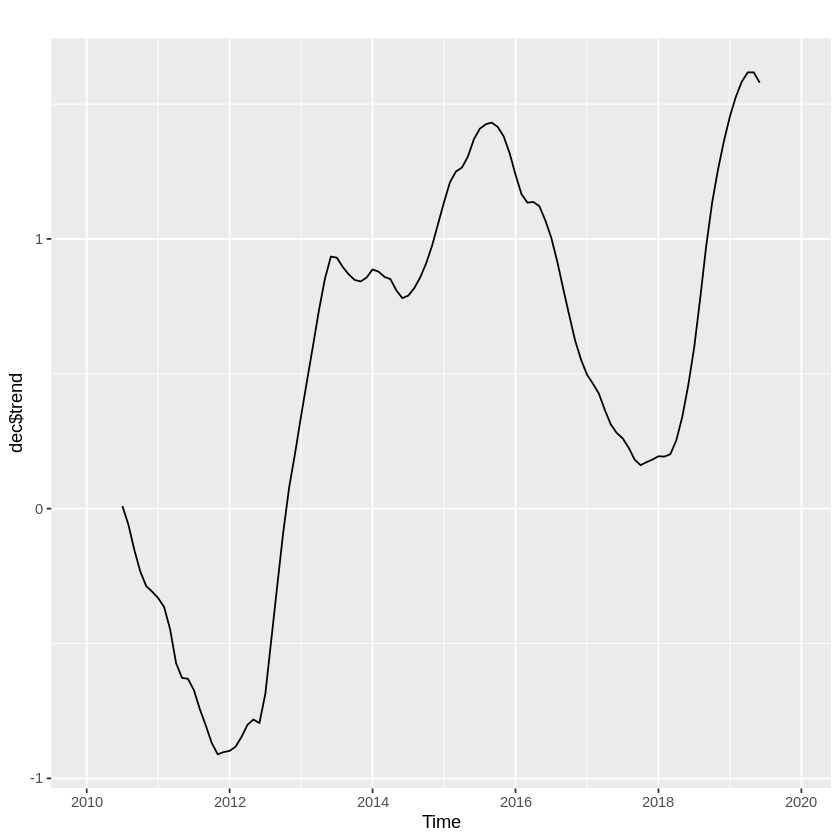

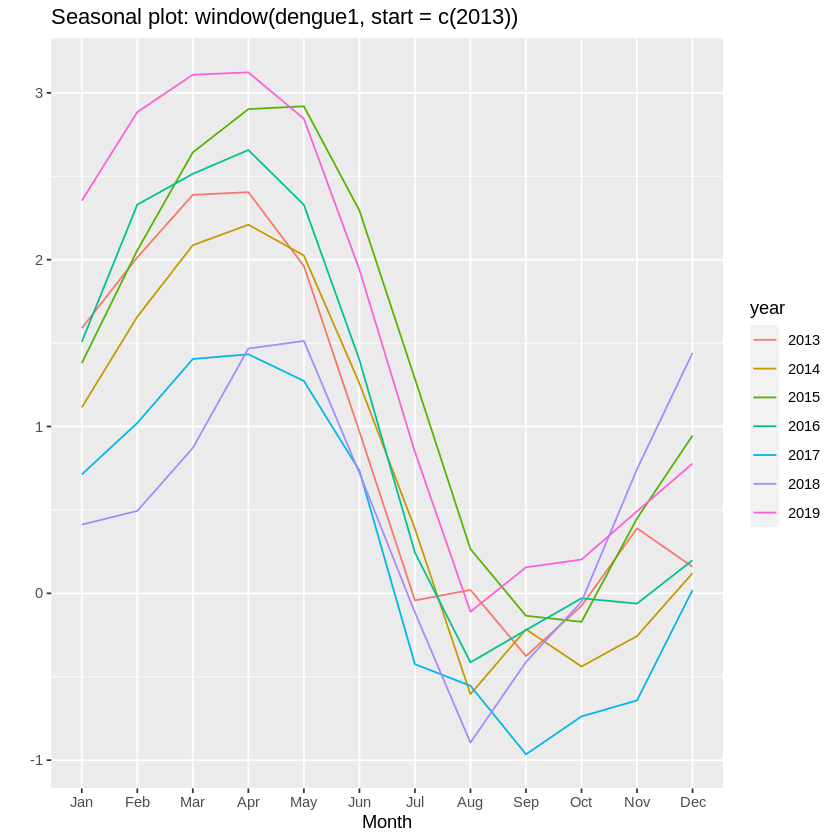

In [78]:
dec =   decompose(dengue1) #verificar como se comporta a ocupação do hotel
autoplot(dec)
autoplot(dec$trend) ##tendencia
ggseasonplot(window(dengue1, start=c(2013)))

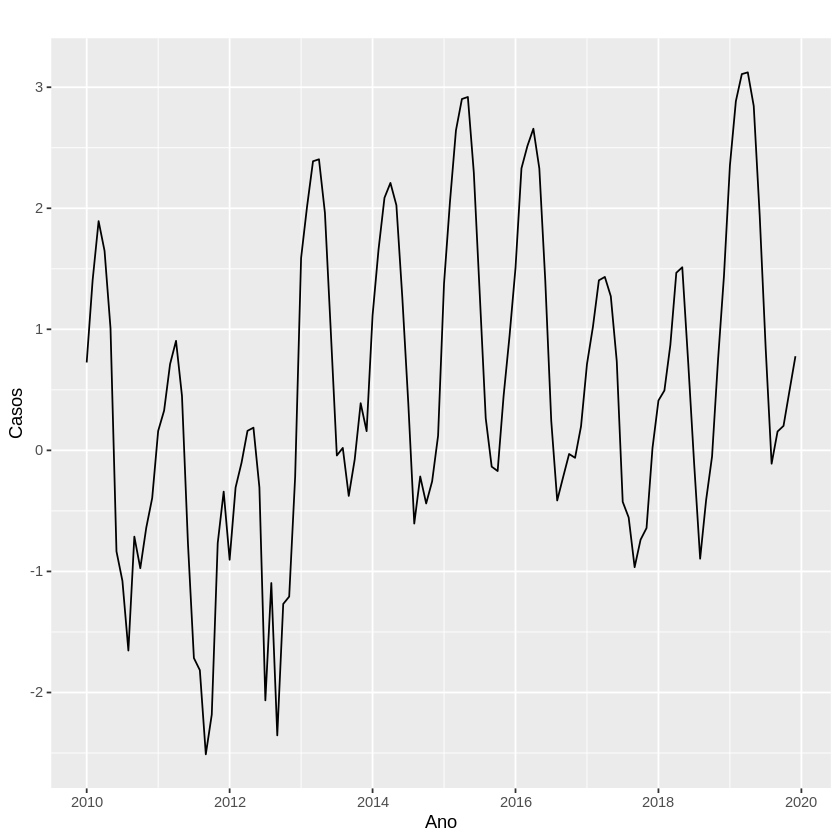

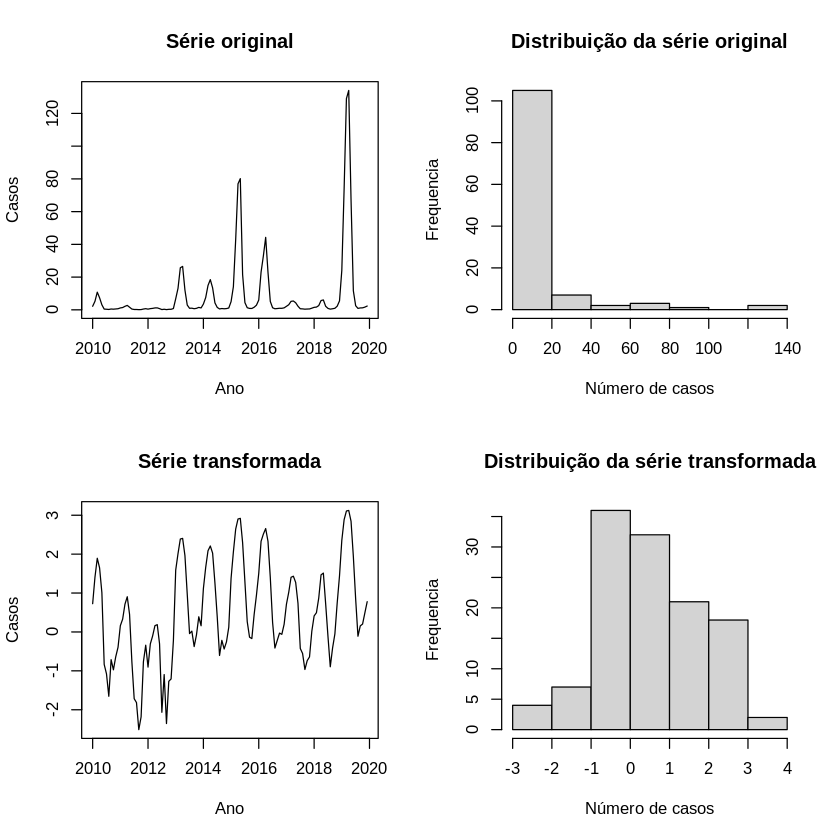

In [79]:
autoplot(dengue1,xlab = "Ano",ylab = "Casos")

par(mfrow=c(2,2))
plot(casos,main="Série original",xlab = "Ano",ylab = "Casos")
hist(casos,main="Distribuição da série original" ,xlab = "Número de casos",ylab = "Frequencia")
plot(dengue1,main="Série transformada",xlab = "Ano",ylab = "Casos")
hist(dengue1,main="Distribuição da série transformada",xlab = "Número de casos",ylab = "Frequencia")


In [80]:
###TESTE DE COX STUART PARA TENDÊNCIA
cox.stuart.test(dengue1)
#Hipótese nula: Não existe tendência
#Hipótese alternativa: Existe tendência


	Cox Stuart test

data:  dengue1
statistic = 51, n = 60, p-value = 3.085e-08
alternative hypothesis: non randomness


In [81]:
###TESTE DE FISHER PARA SAZONALIDADE
fisher.g.test(dengue1)
#Hipótese nula: Não existe sazonalidade
#Hipótese alternativa: Existe sazonalidade

[1] 7.224272e-19

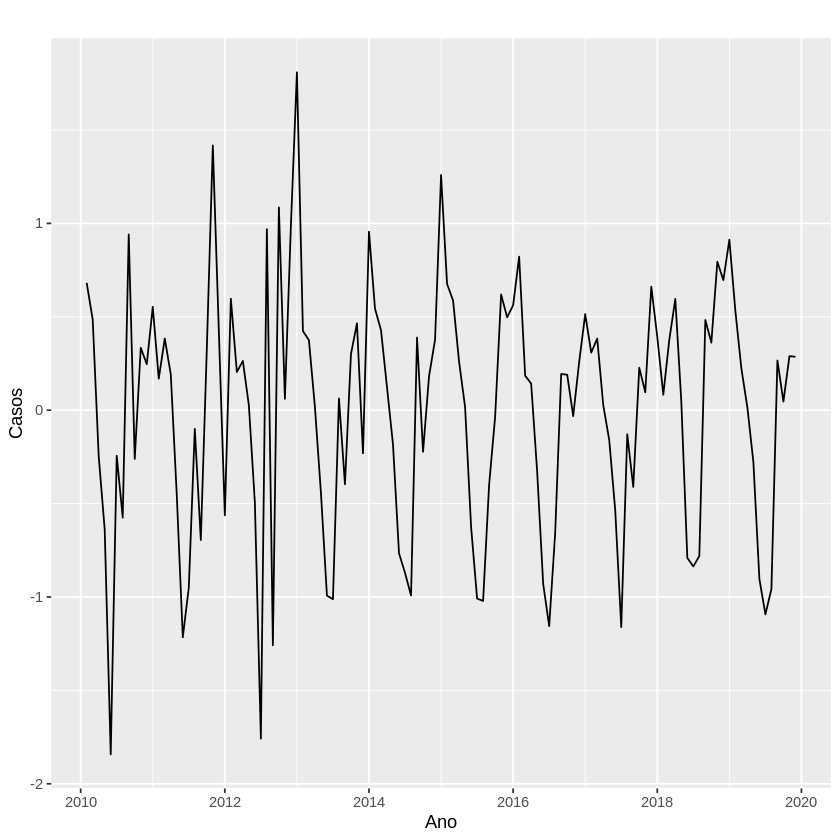

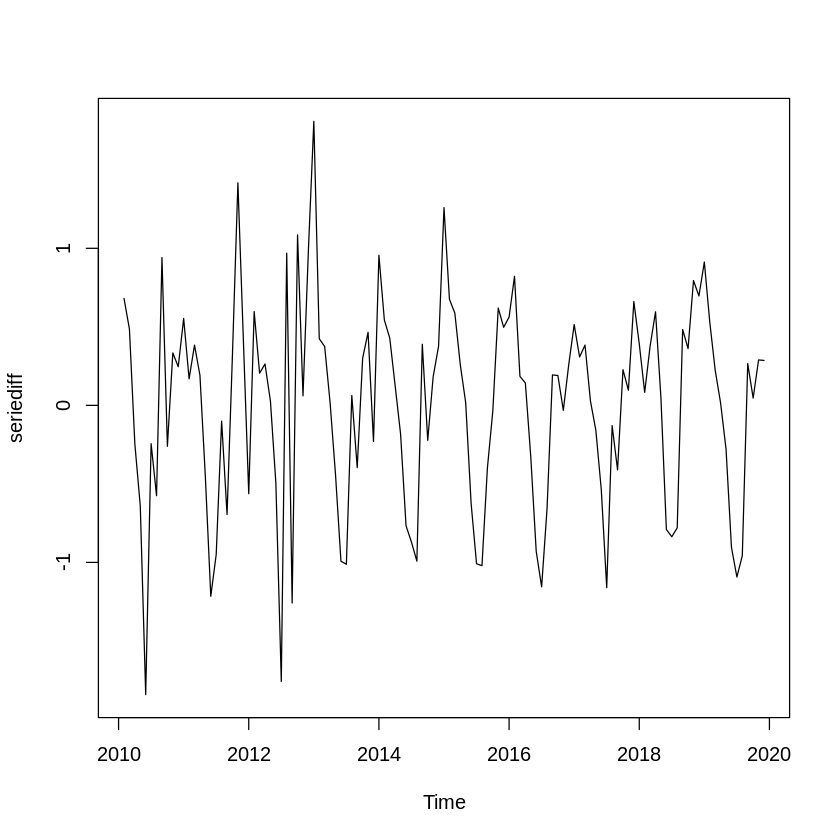

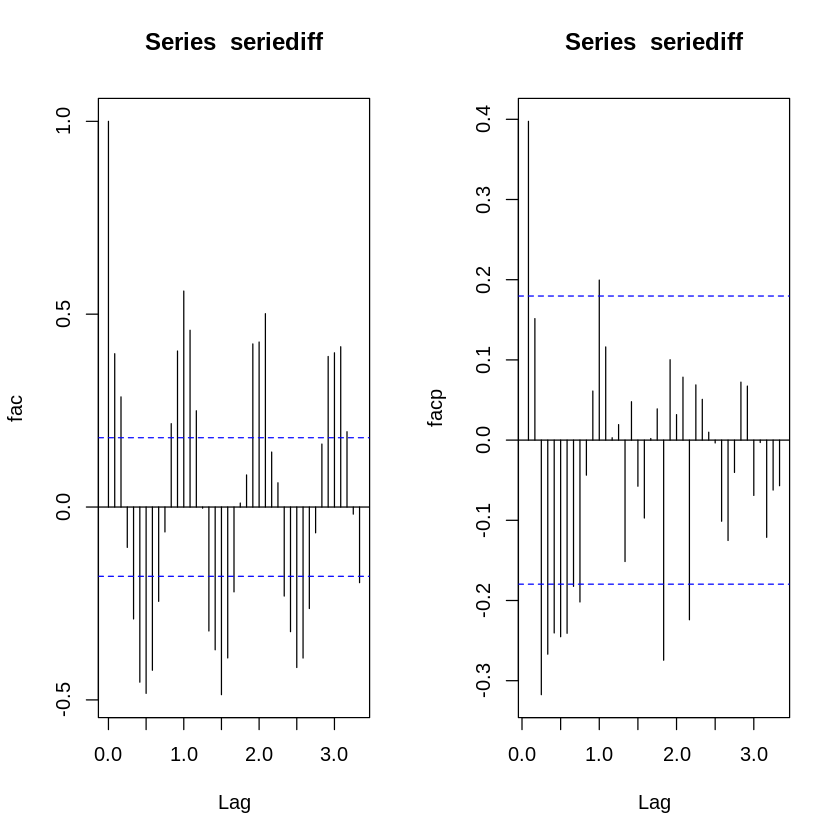

In [85]:
# Série diferenciada 
seriediff=diff(dengue1)
autoplot(diff(dengue1),xlab = "Ano", ylab = "Casos")
ts.plot(seriediff)

#Função de autocorrelação
par(mfrow=c(1,2))
acf(seriediff, lag.max = 40,ylab="fac") 
pacf(seriediff, lag.max = 40, ylab= "facp")


In [86]:
est=ur.kpss(dengue1)
print(est)
ndiffs(dengue1)


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.4612 



[1] 1


 ARIMA(0,0,0)(0,1,0)[12]                    : 303.2482
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 302.0466
 ARIMA(0,0,0)(0,1,1)[12]                    : 295.9231
 ARIMA(0,0,0)(0,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,2)[12]                    : 290.1745
 ARIMA(0,0,0)(0,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,0)[12]                    : 302.122
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 299.4686
 ARIMA(0,0,0)(1,1,1)[12]                    : 292.8918
 ARIMA(0,0,0)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,2)[12]                    : 292.2801
 ARIMA(0,0,0)(1,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(2,1,0)[12]                    : 294.1618
 ARIMA(0,0,0)(2,1,0)[12] with drift         : 286.1381
 ARIMA(0,0,0)(2,1,1)[12]                    : 291.4226
 ARIMA(0,0,0)(2,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(2,1,2)[12]                    : Inf
 ARIMA(0,0,0)(2,1,2)[12] with drift         : Inf
 ARIMA(0,0,1)(0,1,0)[12]                    :

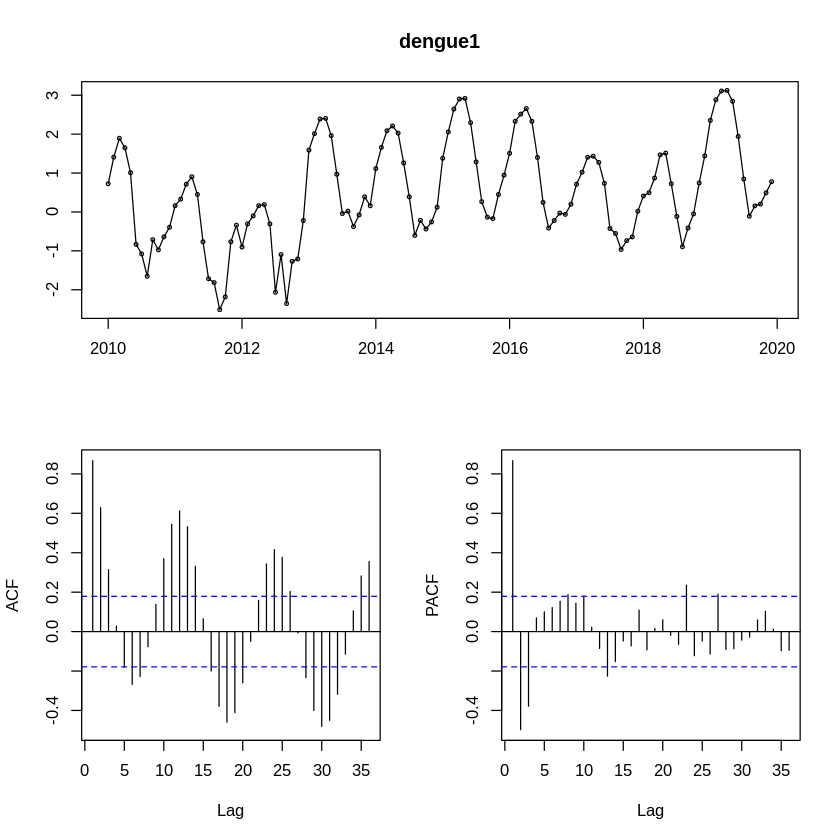

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


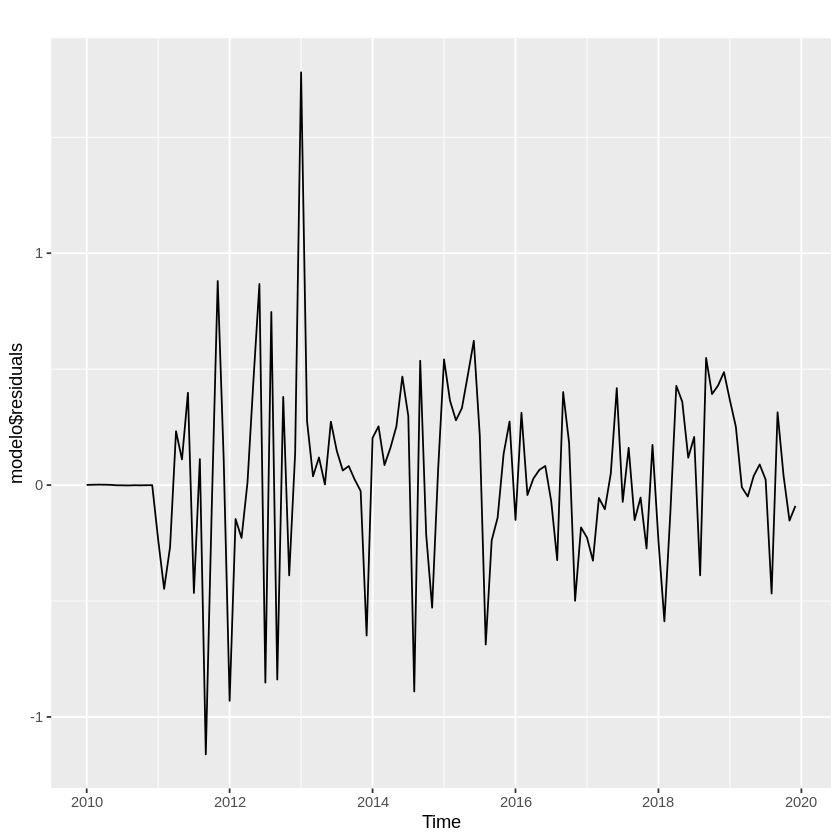

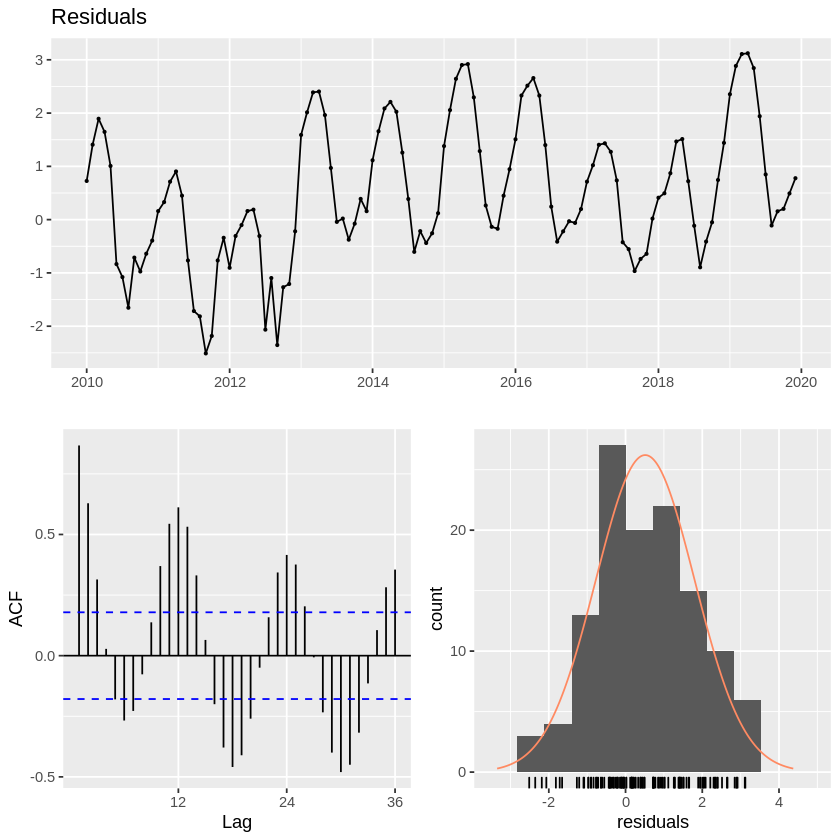

In [84]:
tsdisplay(dengue1)

modelo= auto.arima(dengue1,trace = T,stepwise = F,approximation = F)
autoplot(modelo$residuals)
checkresiduals(dengue1, main="Resíduos")

[1] 0.1526226

[1] 0.03914953

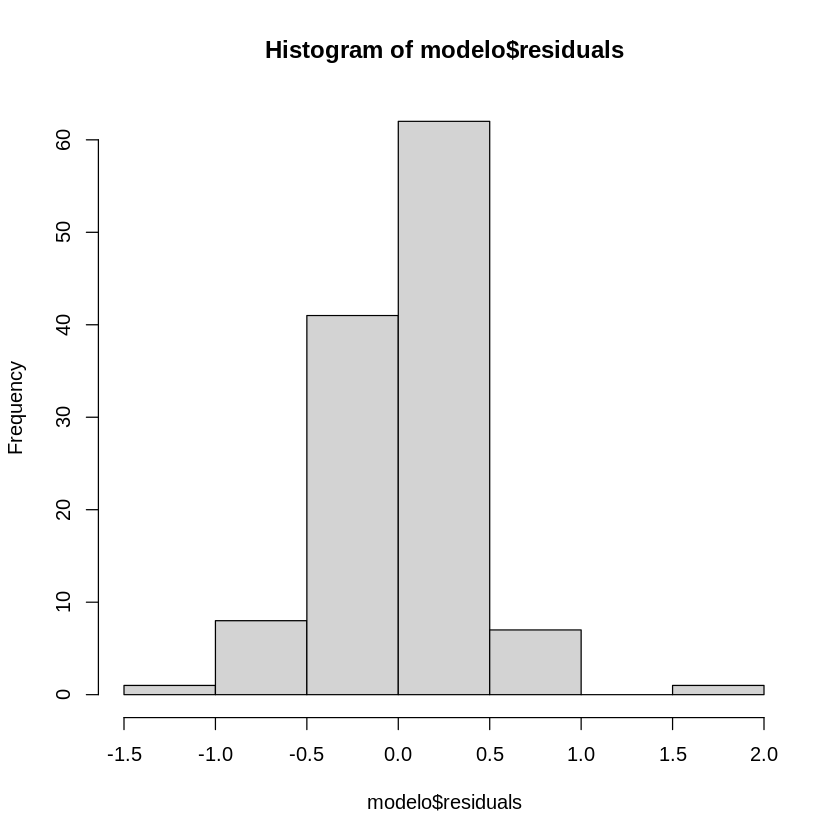

Series: dengue1 
ARIMA(2,0,1)(0,1,1)[12] 

Coefficients:
         ar1     ar2     ma1     sma1
      0.2588  0.6111  0.4446  -0.8859
s.e.  0.2657  0.2285  0.3078   0.1844

sigma^2 estimated as 0.1764:  log likelihood=-66.64
AIC=143.28   AICc=143.87   BIC=156.69



	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.94507, p-value = 9.569e-05


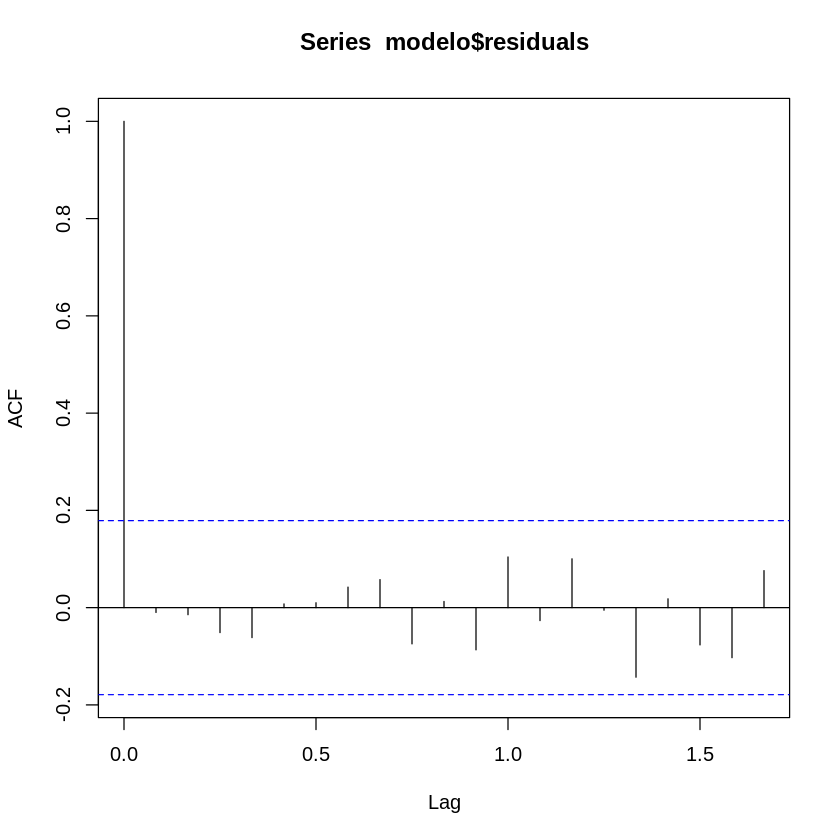

In [19]:
hist(modelo$residuals)
var(modelo$residuals, na.rm=T)
mean(as.vector(modelo$residuals), na.rm = T)
acf(modelo$residuals, na.action = na.pass)
print(modelo)
shapiro.test(modelo$residuals)

ERROR: ignored

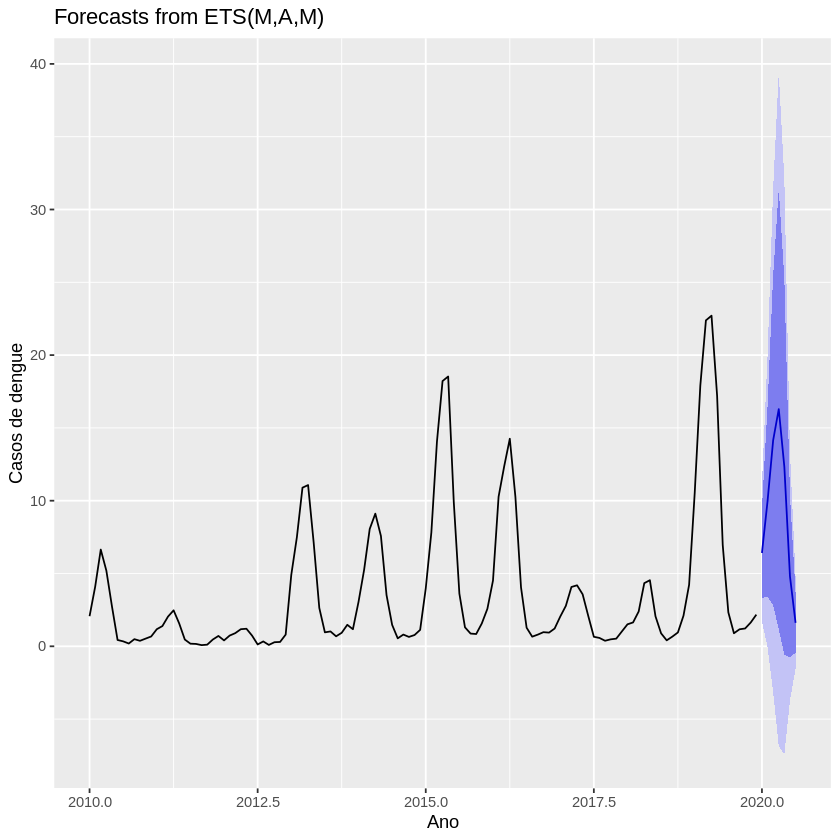

In [88]:
previsao=forecast(dengue1,h=7)

expo=exp(dengue1)
previsao = forecast(expo, h=7)
autoplot(previsao, xlab="Ano",ylab="Casos de dengue")

lines(casostotal)